# **KAIM Week 0 Project Planning - EDA & Stats**

***By Beckham Berhanu***

---



# **TASK 2**
---





# Load and Clean the Data

In [1]:
# Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import neccessary libraries for loading and cleaning the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

In [6]:
path1="/content/drive/MyDrive/KAIM/togo-dapaong_qc.csv"
path2="/content/drive/MyDrive/KAIM/benin-malanville.csv"
path3="/content/drive/MyDrive/KAIM/sierraleone-bumbuna.csv"

In [8]:
togo_df=pd.read_csv(path1)
benin_df=pd.read_csv(path2)
sierraleone_df=pd.read_csv(path3)

# Display first few rows of each dataset to inspect the structure
print("Togo Data:")
print(togo_df.head())

print("Benin Data:")
print(benin_df.head())

print("Sierra Leone Data:")
print(sierraleone_df.head())


Togo Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
Benin Dat

In [9]:
# Check for missing values in each dataset
print(togo_df.isnull().sum())
print(benin_df.isnull().sum())
print(sierraleone_df.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI           

Ensure Timestamp is in Datetime Format


In [11]:
# Convert 'Timestamp' column to datetime
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])

Handle missing Values

In [12]:
# Fill missing values with the mean for each dataset
togo_df.fillna(togo_df.mean(), inplace=True)
benin_df.fillna(benin_df.mean(), inplace=True)
sierraleone_df.fillna(sierraleone_df.mean(), inplace=True)

# Exploratory Data Analysis (EDA)

Summary Statistics: Let's calculate summary statistics to understand the central tendency and spread of the data.

In [13]:
# Summary statistics for each dataset
print(togo_df.describe())
print(benin_df.describe())
print(sierraleone_df.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

Visualizing Distributions: Visualize the distribution of GHI, DNI, and DHI using histograms.


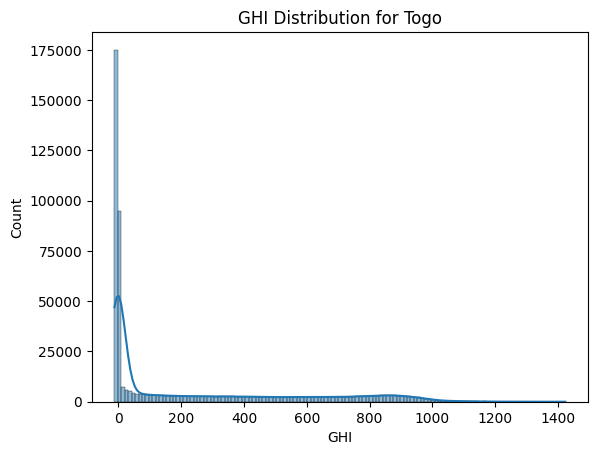

In [14]:
# Visualizing the GHI distribution for Togo
sns.histplot(togo_df['GHI'], kde=True)
plt.title('GHI Distribution for Togo')
plt.show()

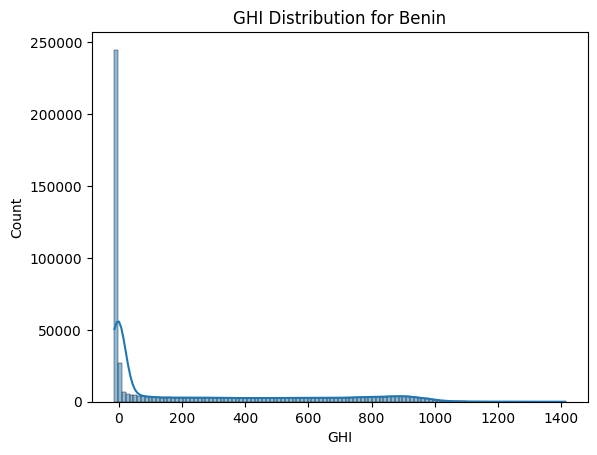

In [15]:
# Visualizing the GHI distribution for Benin
sns.histplot(benin_df['GHI'], kde=True)
plt.title('GHI Distribution for Benin')
plt.show()


Correlation Analysis: Visualize correlations between key variables like GHI, DNI, DHI, and others using a heatmap.

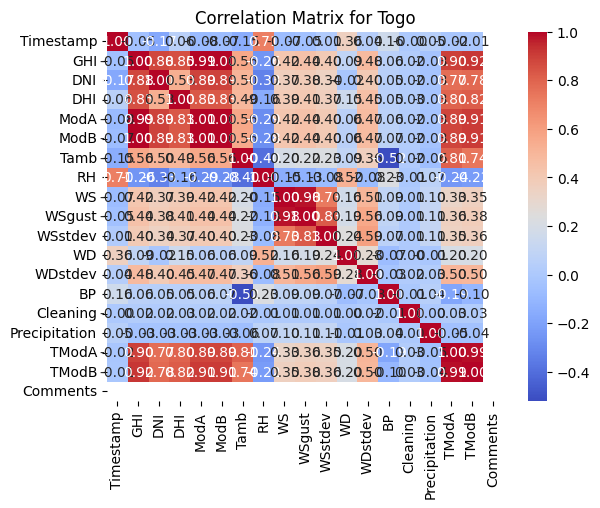

In [16]:
# Correlation matrix for Togo data
sns.heatmap(togo_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Togo')
plt.show()

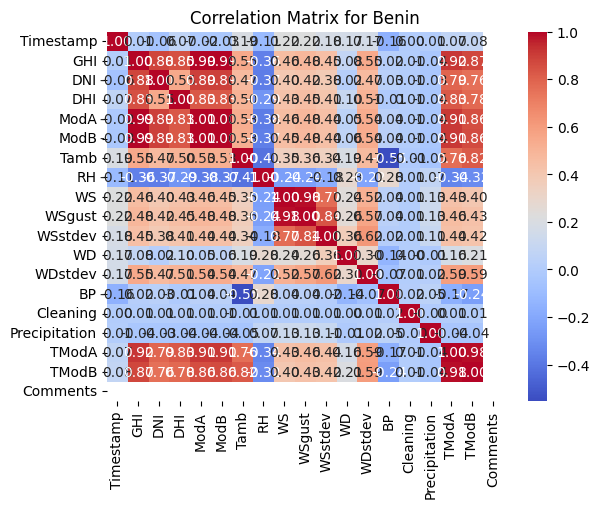

In [17]:
# Correlation matrix for Benin data
sns.heatmap(benin_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Benin')
plt.show()

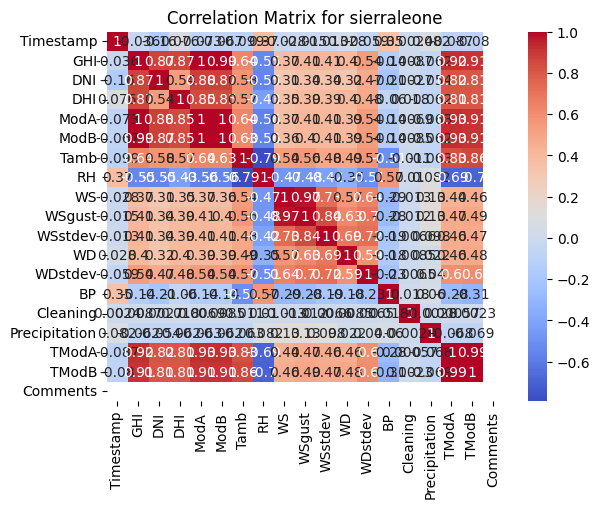

In [20]:
# Correlation matrix for sierraleone data
sns.heatmap(sierraleone_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for sierraleone')
plt.show()

Time Series Analysis: Plot the GHI over time to look for trends, patterns, or anomalies.

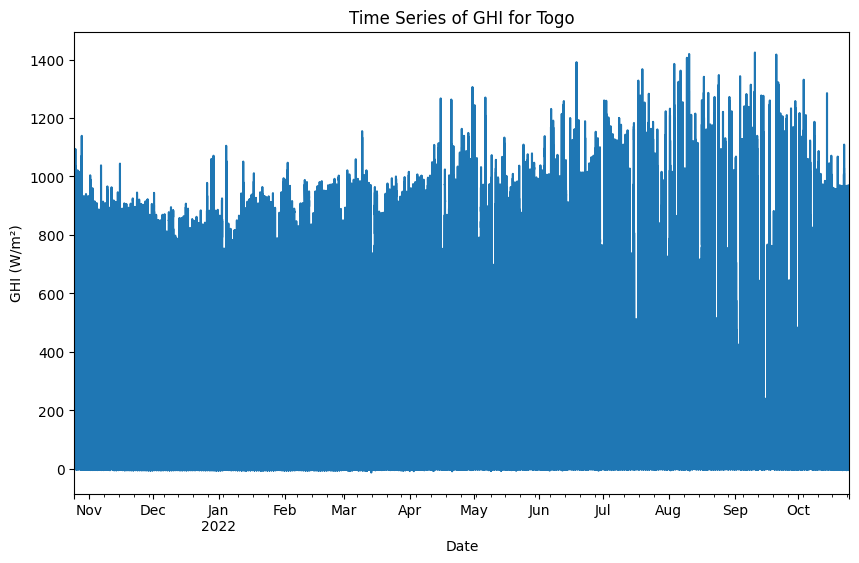

In [21]:
# Set 'Timestamp' as the index and plot GHI for Togo
togo_df.set_index('Timestamp', inplace=True)
togo_df['GHI'].plot(figsize=(10, 6))
plt.title('Time Series of GHI for Togo')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

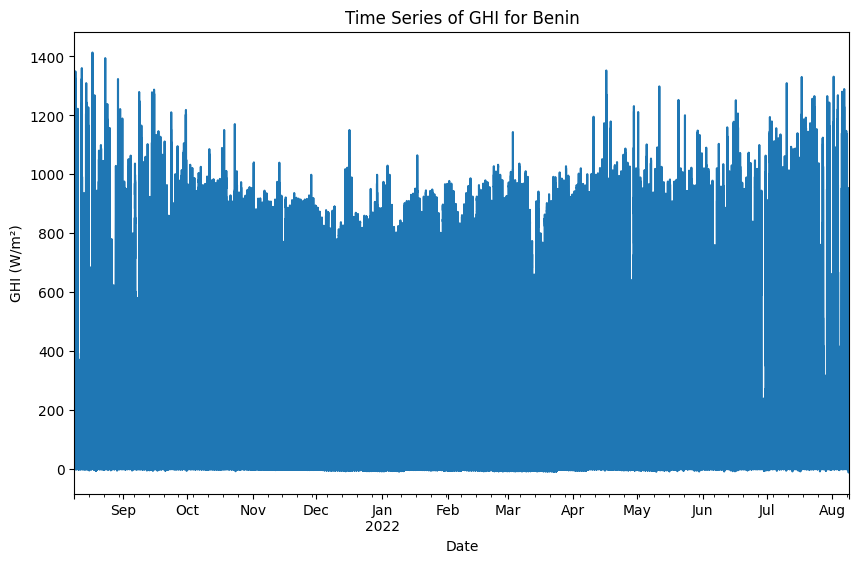

In [22]:
# Set 'Timestamp' as the index and plot GHI for Benin
benin_df.set_index('Timestamp', inplace=True)
benin_df['GHI'].plot(figsize=(10, 6))
plt.title('Time Series of GHI for Benin')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

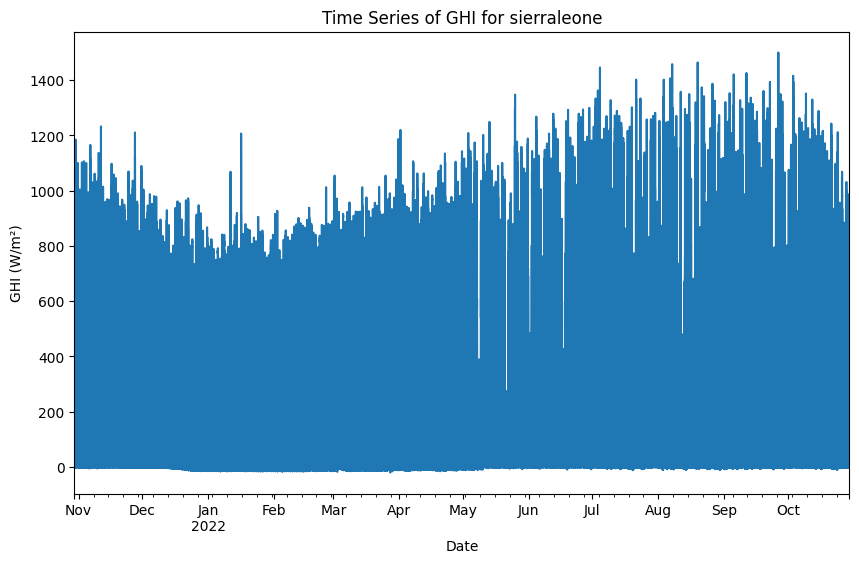

In [23]:
# Set 'Timestamp' as the index and plot GHI for sierraleone
sierraleone_df.set_index('Timestamp', inplace=True)
sierraleone_df['GHI'].plot(figsize=(10, 6))
plt.title('Time Series of GHI for sierraleone')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

Outliers Detection: Use boxplots to visualize outliers in the GHI variable.

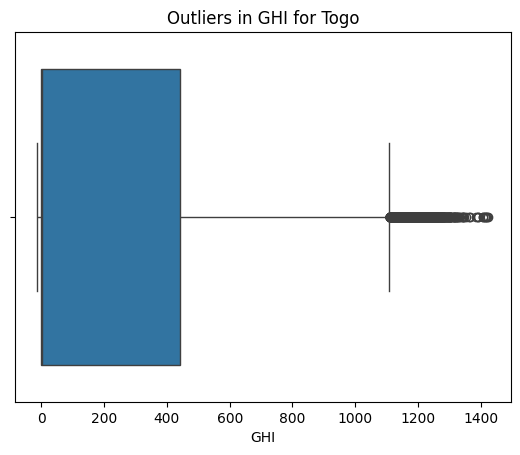

In [24]:
sns.boxplot(x=togo_df['GHI'])
plt.title('Outliers in GHI for Togo')
plt.show()

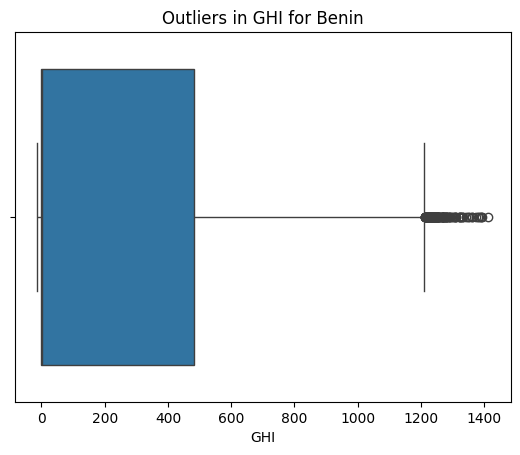

In [26]:
sns.boxplot(x=benin_df['GHI'])
plt.title('Outliers in GHI for Benin')
plt.show()

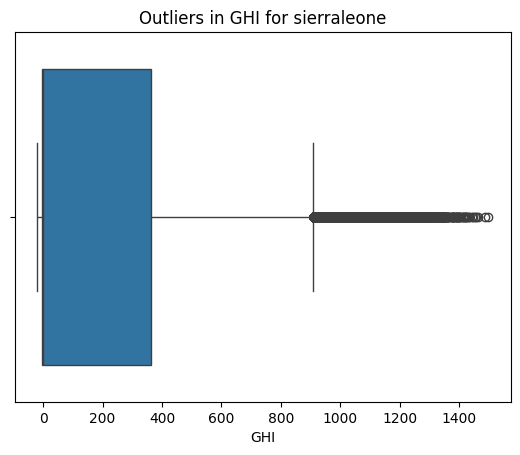

In [27]:
sns.boxplot(x=sierraleone_df['GHI'])
plt.title('Outliers in GHI for sierraleone')
plt.show()

# **Statistical Analysis**

Fit a Normal Distribution: Perform a normality test to check if GHI follows a normal distribution.

In [28]:
# Perform normality test for GHI
_, p_value = stats.normaltest(togo_df['GHI'].dropna())
print(f"P-value for normality test (GHI): {p_value}")

P-value for normality test (GHI): 0.0


In [29]:
# Perform normality test for GHI
_, p_value = stats.normaltest(benin_df['GHI'].dropna())
print(f"P-value for normality test (GHI): {p_value}")

P-value for normality test (GHI): 0.0


In [30]:
# Perform normality test for GHI
_, p_value = stats.normaltest(sierraleone_df['GHI'].dropna())
print(f"P-value for normality test (GHI): {p_value}")

P-value for normality test (GHI): 0.0


Calculate Z-Scores for Outliers: Identify outliers using the Z-score method (typically, values with a Z-score greater than 3 or less than -3 are outliers).

In [31]:
# Calculate Z-scores for GHI
togo_df['GHI_zscore'] = zscore(togo_df['GHI'].dropna())

In [32]:
# Calculate Z-scores for GHI
benin_df['GHI_zscore'] = zscore(benin_df['GHI'].dropna())

# **Results Presentation and Summary**

### Week 0 Challenge Summary: Solar Radiation Analysis

This analysis was conducted as part of the Week 0 Challenge of the 10 Academy: Artificial Intelligence Mastery program. The goal was to analyze solar radiation data from Benin, Sierra Leone, and Togo to derive actionable insights for MoonLight Energy Solutions to create a sustainable solar installation plan. The project developed skills in data engineering, exploratory data analysis, and data visualization.

---

### Key Outcomes

#### Data Cleaning and Preparation:
- Successfully loaded and inspected datasets from the three regions.
- Missing values were identified in columns like "Comments" and handled by imputation (mean value replacement) to ensure data consistency.
- Timestamps were converted to datetime format for proper time-series analysis.

#### Exploratory Data Analysis (EDA):
- **Descriptive Statistics**:
  - Calculated summary statistics for variables like Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI), which indicated regional variations in solar radiation.
- **Visualizations**:
  - Histograms were used to study the distributions of GHI, DNI, and DHI.
  - Heatmaps revealed correlations among variables, emphasizing relationships between solar radiation measures.
  - Time-series plots showcased trends and seasonality in solar radiation over time.
  - Boxplots identified outliers in the GHI variable across all datasets.

#### Statistical Analysis:
- Normality tests for GHI values across all regions showed that the data did not follow a normal distribution (p-value = 0.0).

#### Insights for Solar Installation:
- **Trends and Anomalies**:
  - The analysis identified time periods with peak solar radiation, which can optimize solar panel placements and align cleaning schedules with periods of higher efficiency.
- **Outlier Handling**:
  - Understanding and addressing outliers ensures more reliable forecasting models for energy production.
